In [1]:
import numpy as np
np.random.seed(2016)

import os
import glob
import cv2
import math
import pickle
import datetime
import pandas as pd
import statistics

from sklearn.cross_validation import KFold

from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.metrics import log_loss



Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 75.0% of memory, cuDNN 5105)
/home/ipl/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:

import sys
sys.setrecursionlimit(99999)
import numpy as np
np.random.seed(2016)  # for reproducibility
import keras
import keras.backend as K
import h5py
from keras import optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, merge, Activation, Dropout, Flatten, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.optimizers import RMSprop, SGD
from sklearn.cross_validation import train_test_split

In [3]:


def get_im(path, img_rows, img_cols):
    # Load as grayscale ======>     img = cv2.imread(path, 0)
    img = cv2.imread(path)
    # Reduce size
    resized = cv2.resize(img, (img_cols, img_rows))
    return resized

# interpolation –
# interpolation method:

# INTER_NEAREST - a nearest-neighbor interpolation
# INTER_LINEAR - a bilinear interpolation (used by default)
# INTER_AREA - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
# INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
# INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood

def load_train(img_rows, img_cols):
    X_train = []
    y_train = []
    print('Read train images')
    os.chdir(path)
    print(files)
    for fl in files:
        print(fl)
        img = get_im(fl, img_rows, img_cols)
        X_train.append(img)
        #y_train.append(j)
    return X_train, y_train

In [18]:
x,y=load_train(224, 224)

Read train images
['Alaska Skate/0000006_20160629T090708.061-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alaska Skate/0000007_20160629T090737.662-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alaska Skate/0000008_20160629T090758.152-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alaska Skate/0000261_20160629T182048.410-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alaska Skate/0000262_20160629T182102.977-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alcyonidium pedunculatum/0000030_20160721T113046.594-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alcyonidium pedunculatum/0000069_20160628T123449.832-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alcyonidium pedunculatum/0000070_20160721T114436.134-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Alcyonidium pedunculatum/0000085_20160628T144044.861-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Aleutian Alligatorfish/0000001_20160801T121255.985-0800_Blackfly_BFLY-PGE-50S5C+F4-E1-03.jpg', 'Aleutian Alligatorfish/0000002_20160801T121354.235-0800_Blackf

In [4]:
train_data_dir = '/home/ipl/Fish/C0_rotate'
def build(source=None):
    datagen = ImageDataGenerator(rescale=1. / 255)
    data_generator = datagen.flow_from_directory(
    source,  # this is the target directory
    target_size=(256, 256),  # all images will be resized to 150x150
    batch_size=11,
    class_mode='categorical')
    class_dictionary = data_generator.class_indices
    return data_generator, class_dictionary

In [5]:
data_generator,class_dictionary=build(train_data_dir)

Found 6740 images belonging to 146 classes.


In [6]:
files=data_generator.filenames

In [7]:
indice=data_generator.class_indices
indice

{'Alaska Skate': 0,
 'Alcyonidium pedunculatum': 1,
 'Aleutian Alligatorfish': 2,
 'Aleutian Skate': 3,
 'Antlered Sculpin': 4,
 'Argis ovifer': 5,
 'Arrowtooth Flounder': 6,
 'Ascidia paratropa': 7,
 'Atka Mackerel': 8,
 'Bairdi Tanner Crab': 9,
 'Balanus Sp': 10,
 'Barnacle': 11,
 'Bathymaster Signatus': 12,
 'Bathyplotes sp': 13,
 'Bathyraja mariposa': 14,
 'Bathyraja maripose egg case': 15,
 'Berryteuthis magister': 16,
 'Black Rockfish': 17,
 'Black Spotted Rockfish': 18,
 'Brown King Crab': 19,
 'Bryozoichthys lysimus': 20,
 'Bryozoichthys marjorius': 21,
 'Calcigorgia spiculifera': 22,
 'Ceramaster Sp': 23,
 'Cheisraster Dawsinii': 24,
 'Chinook Salmon': 25,
 'Chrysaora melanaster': 26,
 'Chylamys Sp': 27,
 'Clinocardium Sp': 28,
 'Craniella Sp': 29,
 'Crella brunnea': 30,
 'Crossaster papposus': 31,
 'Cryogorgia koolsae': 32,
 'Cucumaria fallax': 33,
 'Dark Rockfish': 34,
 'Decapodiformes': 35,
 'Diplopteraster multipes': 36,
 'Docked Lumpsucker': 37,
 'Docked Snailfish': 38,
 

In [191]:
arrindice=list(sorted((indice.keys())))

In [192]:
arrindice

['Alaska Skate',
 'Alcyonidium pedunculatum',
 'Aleutian Alligatorfish',
 'Aleutian Skate',
 'Antlered Sculpin',
 'Argis ovifer',
 'Arrowtooth Flounder',
 'Ascidia paratropa',
 'Atka Mackerel',
 'Bairdi Tanner Crab',
 'Balanus Sp',
 'Barnacle',
 'Bathymaster Signatus',
 'Bathyplotes sp',
 'Bathyraja mariposa',
 'Bathyraja maripose egg case',
 'Berryteuthis magister',
 'Black Rockfish',
 'Black Spotted Rockfish',
 'Brown King Crab',
 'Bryozoichthys lysimus',
 'Bryozoichthys marjorius',
 'Calcigorgia spiculifera',
 'Ceramaster Sp',
 'Cheisraster Dawsinii',
 'Chinook Salmon',
 'Chrysaora melanaster',
 'Chylamys Sp',
 'Clinocardium Sp',
 'Craniella Sp',
 'Crella brunnea',
 'Crossaster papposus',
 'Cryogorgia koolsae',
 'Cucumaria fallax',
 'Dark Rockfish',
 'Decapodiformes',
 'Diplopteraster multipes',
 'Docked Lumpsucker',
 'Docked Snailfish',
 'Dover Sole',
 'Dusky Rockfish',
 'Evasterias',
 'Fanellia compressa',
 'Flathead Sole',
 'Fusitriton oregonensis',
 'Ghost Sponge',
 'Giant Grena

In [8]:
import operator

#sorted_x = sorted(indice.items(), key=operator.itemgetter(1))
sorted_x =sorted(indice.keys(), key=lambda indice: indice[1])

In [168]:
f=open('f1.txt','w')
for ele in arrindice:
    f.write(ele+'\n')

f.close()

In [9]:
path=data_generator.directory

In [10]:
path

'/home/ipl/Fish/C0_rotate'

In [11]:
y=data_generator.classes #####下面的好像不用執行

In [18]:
#2016/11/12周六 下午01:51
#(https://github.com/felixlaumon/kaggle-right-whale/blob/master/notebooks/Stacking.ipynb)
#下面是要列出PLOT圖表

In [16]:
cd ..

/home/ipl/Fish


In [12]:
%matplotlib inline
from time import strftime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split

from ipywidgets import interact

from utils import TrainSplit

ImportError: No module named 'utils'

In [27]:

class FakeNet(object):
    regression = False

def get_train_valid_split(X, y):
    ts = TrainSplit(0.15, random_state=42, stratify=False)
    X_train, X_test, y_train, y_test = ts(X, y, FakeNet()) 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_valid_split(x, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

TypeError: only integer arrays with one element can be converted to an index

In [19]:
#######2016/11/12周六 下午01:51
#END

In [20]:
classes= np_utils.to_categorical(data_generator.classes, 146)
classes

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [21]:
y=np.array(classes, dtype=np.uint8)
y.shape

(6740, 146)

In [22]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [23]:
train_data = np.array(x, dtype=np.uint8)

In [24]:
train_data.shape

(6740, 224, 224, 3)

In [33]:
train_data = train_data.reshape(train_data.shape[0], 3, 224, 224)
#train_data = train_data.reshape(train_data.shape[0], 1, img_rows, img_cols)
train_data.shape

(6740, 3, 224, 224)

In [34]:
train_data = train_data.astype('float32')
train_data /= 255 #mormalization
print('Train shape:', train_data.shape)
print(train_data.shape[0], 'train samples')

Train shape: (6740, 3, 224, 224)
6740 train samples


In [35]:
#train_data

In [40]:
#2016/11/12
#先寫train_data跟y 進去
#y_catorarie也順便

np.save('X.npy', train_data)


In [46]:
np.save('y.npy', y)


In [47]:
np.save('y_binary.npy', y_binary)


In [60]:
#####


<_io.BufferedRandom name=65>

In [49]:
#2016/11/12 
#shuffle data


In [61]:
from sklearn.utils import shuffle
train_data_shuffle,y_shuffle, y_binary_shuffle = shuffle(train_data,y, y_binary, random_state=0)

In [69]:
##大成功

In [16]:
#做資料增多(Data Augumentation)到新資料夾， 當作TestData

In [49]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

# i = 0
# for batch in datagen.flow(train_data, batch_size=1,
#                           save_to_dir='/home/ipl/Fish/Au'):
#     i += 1
#     if i > 20:
#         break 

In [40]:
#做model fit

In [70]:
# path to the model weights files.
weights_path = '/home/ipl/Fish/vgg16_weights.h5'
top_model_weights_path = '/home/ipl/Fish/fc_model.h5'
# dimensions of our images.
img_width, img_height = 256, 256

In [71]:

from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D

img_width, img_height = 256, 256

# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), batch_input_shape=(1, 3, img_width, img_height)))
first_layer = model.layers[-1]
# this is a placeholder tensor that will contain our generated images
input_img = first_layer.input

# build the rest of the network
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])





In [72]:
# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(146, activation='sigmoid'))


# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)


# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False



Model loaded.


In [73]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])

In [54]:
y_train = y.reshape((-1, 1))

In [55]:
y_train.shape

(6740, 1)

In [56]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(y_train)

In [57]:
y_binary.shape

(6740, 146)

In [58]:
y_binary[50]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [19]:
y

[]

In [34]:
#用InceptionV3來train train看

In [74]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)


In [75]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(146, activation='softmax')(x)

# this is the model we will train
model = Model(input=base_model.input, output=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [76]:

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
# model.fit(train_data, y, batch_size=64, nb_epoch=50,
#               show_accuracy=True, verbose=1, validation_split=0.2)
hist =model.fit(x=train_data_shuffle, y=y_binary_shuffle,
              batch_size=32,
              nb_epoch=20,
              validation_split=0.2,
              verbose=1,
              shuffle=True)

Train on 5392 samples, validate on 1348 samples
Epoch 1/1
5392/5392 [==============================] - 31s - loss: 0.5411 - acc: 0.8683 - val_loss: 1.5632 - val_acc: 0.6239


In [88]:
print(hist.history)

{'acc': [0.86832344213649848], 'loss': [0.54111984221800857], 'val_acc': [0.62388724035608312], 'val_loss': [1.5631818157629018]}


In [ ]:
#20161113 04:16  train_test_split   抽出後面２０%  
#注意要重新ｔｒａｉｎ ｍｏｄｅｌ !!
#######################################
X_train, X_test, y_train, y_test = train_test_split(train_data, y_shuffle, test_size=0.33, random_state=42)

In [260]:
print("X_train.shape:  ",X_train.shape)
print("y_train.shape:  ",y_train.shape)
print("------")
print("X_test.shape:  ",X_test.shape)
print("y_test.shape:  ",y_test.shape)

X_train.shape:   (4515, 3, 224, 224)
y_train.shape:   (4515, 146)
------
X_test.shape:   (2225, 3, 224, 224)
y_test.shape:   (2225, 146)


In [257]:
y_test_pred_proba_raw = model.predict(X_test)

In [278]:
y_test_pred_proba_raw.shape

(2225, 146)

In [287]:
y_train.shape

(4515, 146)

In [283]:
def get_actual_pred_proba(raw_pred_proba):
    pred_proba = np.zeros((len(raw_pred_proba), 146))
    for i, label in enumerate(np.unique(y_train)):
        print(i,"  Lable: ",label)
        pred_proba[:, label] = raw_pred_proba[:, i]
    return pred_proba

In [284]:
y_test_pred_proba = get_actual_pred_proba(y_test_pred_proba_raw)

0   Lable:  0.0
1   Lable:  1.0


/home/ipl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [281]:
y_test_pred_proba[1]

array([  2.54309212e-04,   7.96862441e-05,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [ ]:
#########################################

In [90]:
#20161112 下午05:10
#做個visulization好了

In [108]:
y

array([  0,   0,   0, ..., 145, 145, 145], dtype=int32)

In [140]:
y_list=y.tolist()

In [149]:
from matplotlib.pyplot import show
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
total = float(len(titanic)) # one person per row 
ax = sns.barplot(x="class", hue="who", data=titanic)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+ 3, '%1.2f'%(height/total))
show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Label 0   Numer:  5
Label 1   Numer:  4
Label 2   Numer:  2
Label 3   Numer:  10
Label 4   Numer:  1
Label 5   Numer:  1
Label 6   Numer:  436
Label 7   Numer:  4
Label 8   Numer:  307
Label 9   Numer:  7
Label 10   Numer:  1
Label 11   Numer:  18
Label 12   Numer:  97
Label 13   Numer:  1
Label 14   Numer:  17
Label 15   Numer:  1
Label 16   Numer:  131
Label 17   Numer:  21
Label 18   Numer:  139
Label 19   Numer:  45
Label 20   Numer:  2
Label 21   Numer:  2
Label 22   Numer:  1
Label 23   Numer:  4
Label 24   Numer:  3
Label 25   Numer:  1
Label 26   Numer:  2
Label 27   Numer:  18
Label 28   Numer:  1
Label 29   Numer:  1
Label 30   Numer:  1
Label 31   Numer:  12
Label 32   Numer:  2
Label 33   Numer:  27
Label 34   Numer:  1
Label 35   Numer:  1
Label 36   Numer:  2
Label 37   Numer:  1
Label 38   Numer:  1
Label 39   Numer:  55
Label 40   Numer:  67
Label 41   Numer:  1
Label 42   Numer:  4
Label 43   Numer:  511
Label 44   Numer:  7
Label 45   Numer:  2
Label 46   Numer:  40
L

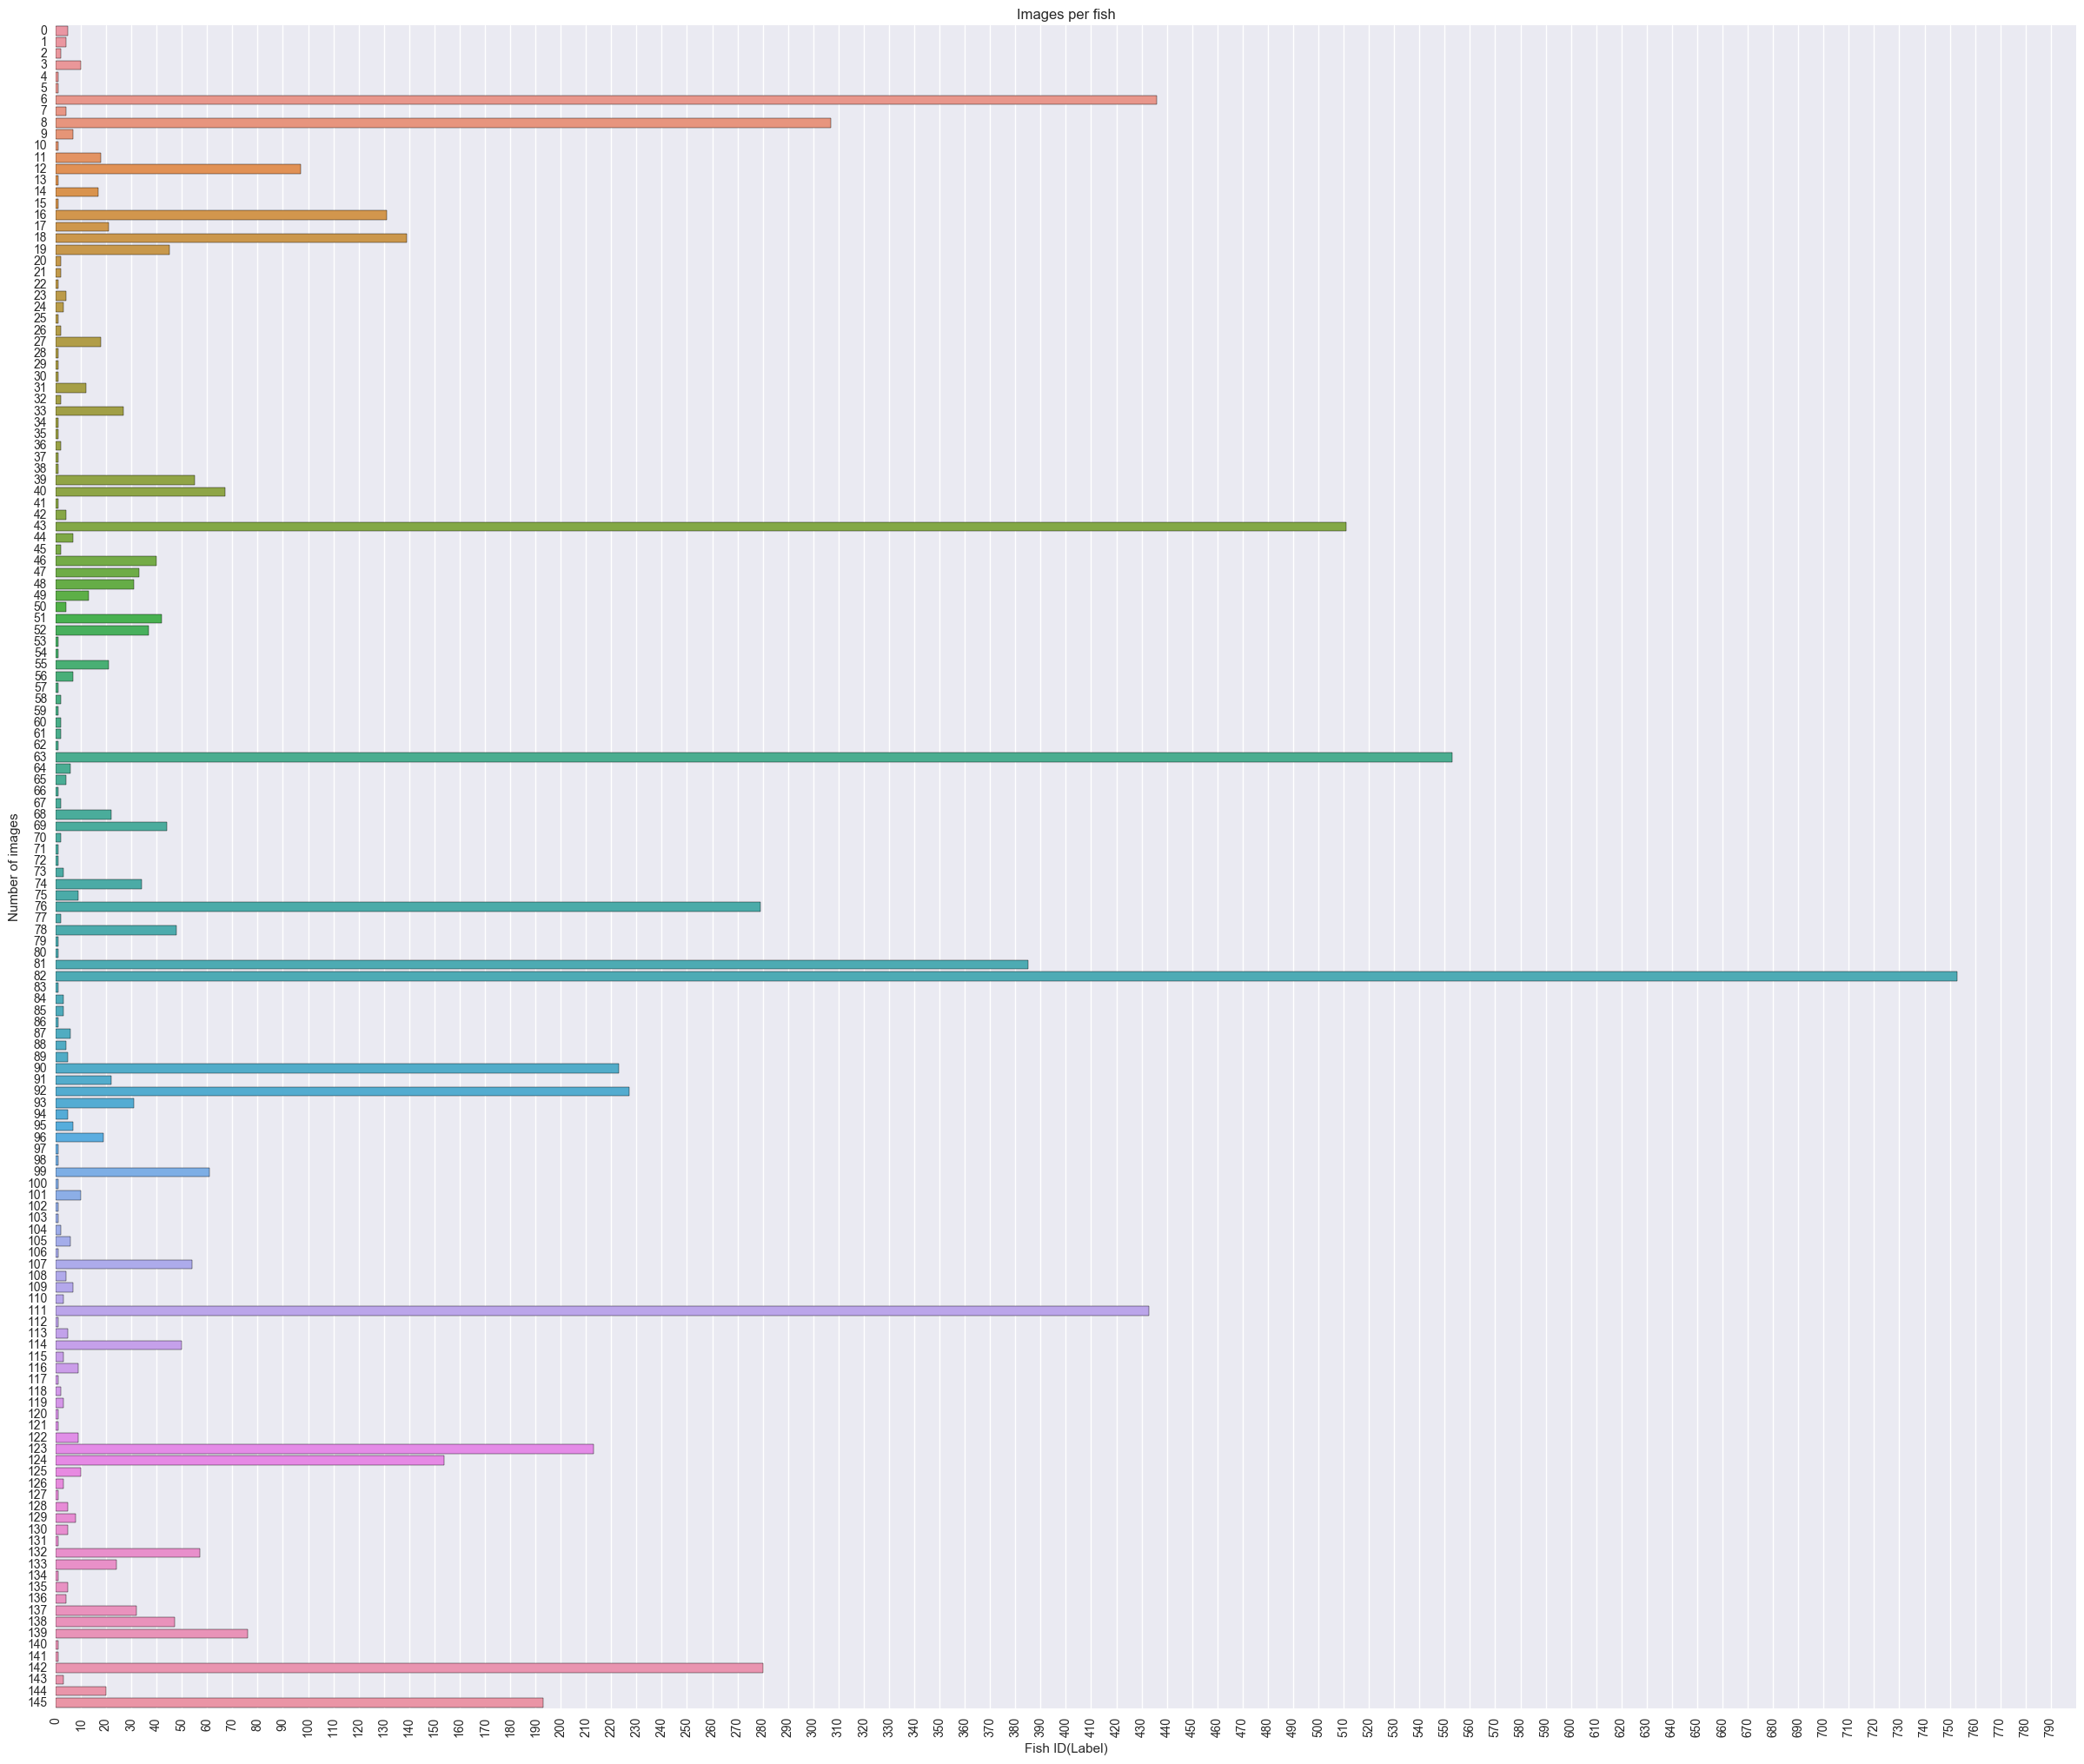

In [244]:

plt.figure(figsize=(30, 25))
# plt.title('Local train / test split')
# _ = plt.hist(y_train, bins=range(447), label='train')
# _ = plt.hist(y_test, bins=range(447), label='valid/test')
# plt.legend()


#_ = plt.hist(y, bins=range(447))
_ = sns.countplot(y=y)
# label=[]
# number=[]
a=0
for p in _.patches:
    height = p.get_height()
    num=y_list.count(a)
#     label.append(a)
#     number.append(num)
    print("Label "+str(a)+"   Numer:  "+str(num))
    #_.text(p.get_y(), height+ 30, '%1.2f'%(num))
    #_.text(p.get_y(), height+ 5, '%1.2f'%(num/6740))
    a=a+1

plt.title('Images per fish')
plt.ylabel('Number of images')
plt.xlabel('Fish ID(Label)')
_ = plt.xticks(range(0,800, 10), rotation=90)

In [246]:
#2016 11/12 需要建立一個pd.frame 來fit seaborn
df = pd.DataFrame({'Num':number},index=indice)
df=df.sort(axis=0)

/home/ipl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


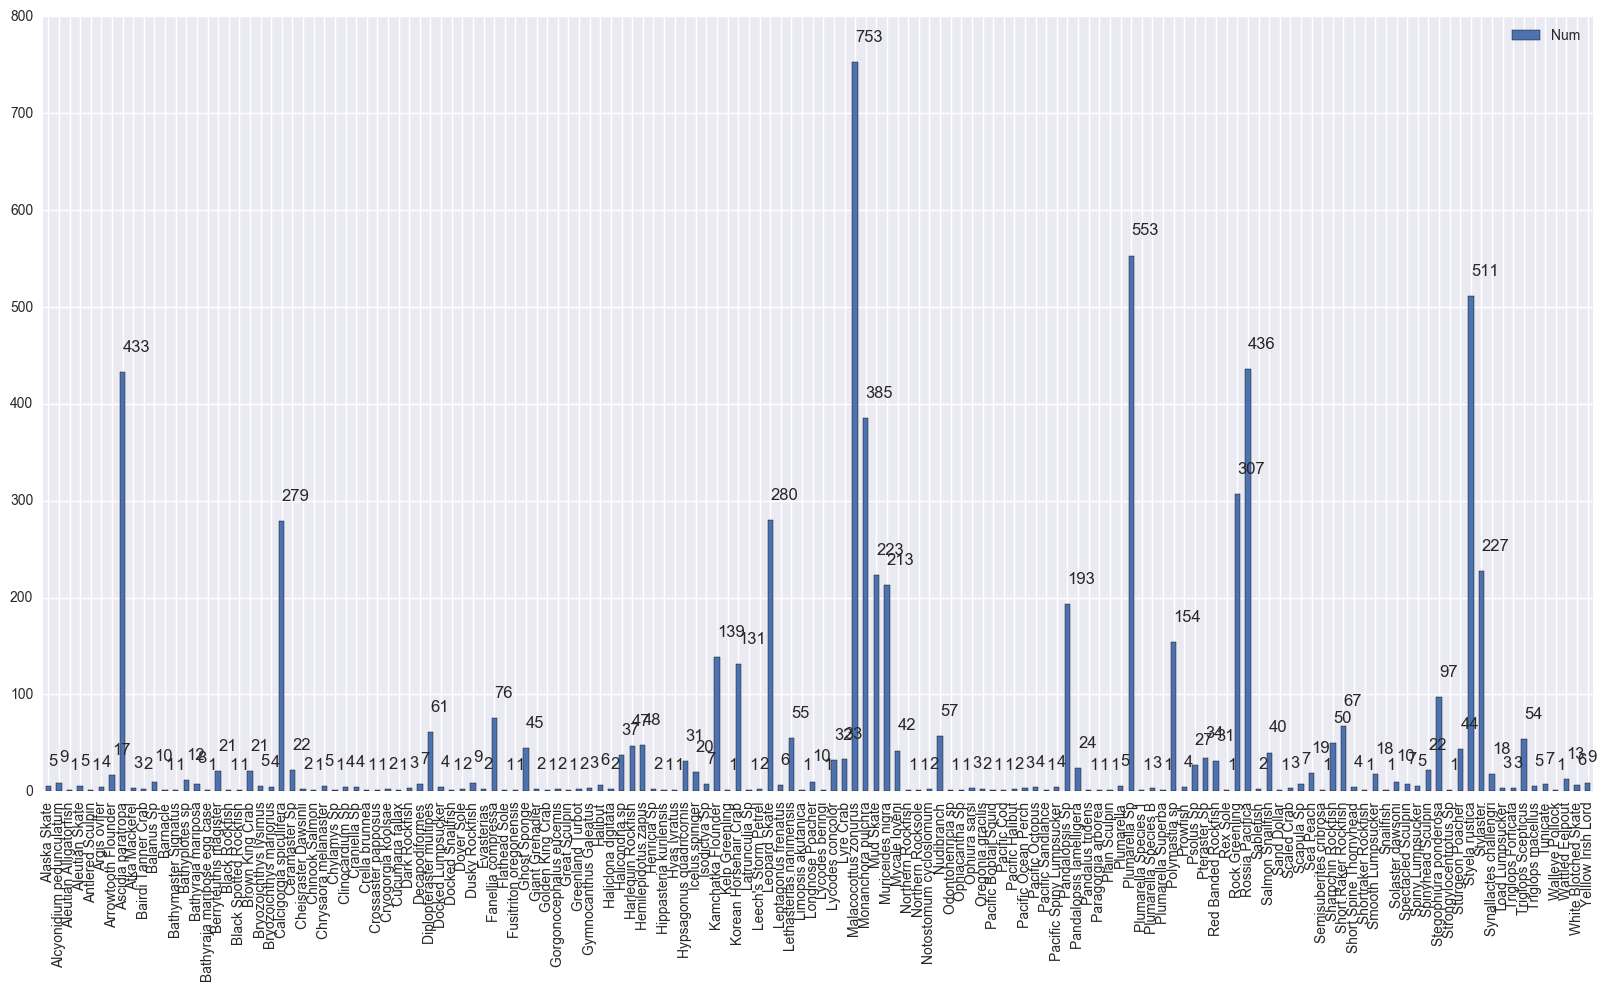

In [247]:
ax = df.plot(kind='bar',figsize=(20,10))
for idx, label in enumerate(list(df.index)): 
        for acc in df.columns:
            value = np.round(df.ix[idx][acc],decimals=2)
            ax.annotate(value,
                        (idx, value),
                         xytext=(0, 15), 
                         textcoords='offset points')
            

In [231]:
_= sns.countplot(x=s)
_ = plt.xticks(range(0,70, 10), rotation=0)

TypeError: 'numpy.int64' object is not iterable

In [250]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

In [ ]:
#2016/11/12 04:02 
# 1. 用data generater讀取圖片位址跟class




#2. shuffle
from sklearn.utils import shuffle
train_data_shuffle,y_shuffle, y_binary_shuffle = shuffle(train_data,y, y_binary, random_state=0)




#這個版本式沒有做Data Augumetation的
###會不會做normalization有影響? 
#因為現在是有做的，可以試試看沒有做的?


In [48]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 172 layers and unfreeze the rest:
for layer in model.layers[:172]:
   layer.trainable = False
for layer in model.layers[172:]:
   layer.trainable = True


0 input_3
1 convolution2d_189
2 batchnormalization_189
3 convolution2d_190
4 batchnormalization_190
5 convolution2d_191
6 batchnormalization_191
7 maxpooling2d_7
8 convolution2d_192
9 batchnormalization_192
10 convolution2d_193
11 batchnormalization_193
12 maxpooling2d_8
13 convolution2d_197
14 batchnormalization_197
15 convolution2d_195
16 convolution2d_198
17 batchnormalization_195
18 batchnormalization_198
19 averagepooling2d_21
20 convolution2d_194
21 convolution2d_196
22 convolution2d_199
23 convolution2d_200
24 batchnormalization_194
25 batchnormalization_196
26 batchnormalization_199
27 batchnormalization_200
28 mixed0
29 convolution2d_204
30 batchnormalization_204
31 convolution2d_202
32 convolution2d_205
33 batchnormalization_202
34 batchnormalization_205
35 averagepooling2d_22
36 convolution2d_201
37 convolution2d_203
38 convolution2d_206
39 convolution2d_207
40 batchnormalization_201
41 batchnormalization_203
42 batchnormalization_206
43 batchnormalization_207
44 mixed1
45 c

In [ ]:
#還要做layer filter visulization

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/home/ipl/Fish/C0_rotate',
        target_size=(224, 224),
        batch_size=32,
        class_mode='sparse')

In [50]:
datagen.fit(train_data)

In [54]:

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer='adadelta', loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers

model.fit_generator(datagen.flow(train_data, y_binary, batch_size=32, shuffle=True),
                    samples_per_epoch=len(train_data),#validation_data=val_datagen.flow(val_X, val_y, batch_size=BATCH_SIZE), nb_val_samples=val_X.shape[0])
                    nb_epoch=20)

Epoch 1/20
6740/6740 [==============================] - 46s - loss: 2.2422    
Epoch 2/20
6740/6740 [==============================] - 45s - loss: 1.4841    
Epoch 3/20
6740/6740 [==============================] - 45s - loss: 1.2422    
Epoch 4/20
6740/6740 [==============================] - 46s - loss: 1.0875    
Epoch 5/20
6740/6740 [==============================] - 45s - loss: 0.9764    
Epoch 6/20
6740/6740 [==============================] - 45s - loss: 0.8903    
Epoch 7/20
6740/6740 [==============================] - 45s - loss: 0.8007    
Epoch 8/20
6740/6740 [==============================] - 46s - loss: 0.7665    
Epoch 9/20
6740/6740 [==============================] - 45s - loss: 0.7072    
Epoch 10/20
6740/6740 [==============================] - 46s - loss: 0.6417    
Epoch 11/20
6740/6740 [==============================] - 45s - loss: 0.6093    
Epoch 12/20
6740/6740 [==============================] - 44s - loss: 0.5833    
Epoch 13/20
6740/6740 [==========================

In [66]:
#再上面忘記做validation,只好在這邊做evaluate
score = model.evaluate(train_data, y_binary, batch_size=32, verbose=1, sample_weight=None)

6740/6740 [==============================] - 31s    


In [77]:
model.fit(x=train_data, y=y_binary,
              batch_size=32,
              nb_epoch=20,
              validation_split=0.2,
          verbose=1,
              shuffle=True)

Train on 5392 samples, validate on 1348 samples
Epoch 1/20
5392/5392 [==============================] - 39s - loss: 0.0630 - acc: 0.9824 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/20
5392/5392 [==============================] - 39s - loss: 0.0487 - acc: 0.9900 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/20
5392/5392 [==============================] - 40s - loss: 0.0431 - acc: 0.9902 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/20
5392/5392 [==============================] - 40s - loss: 0.0379 - acc: 0.9928 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/20
5392/5392 [==============================] - 40s - loss: 0.0345 - acc: 0.9931 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/20
5392/5392 [==============================] - 40s - loss: 0.0336 - acc: 0.9943 - val_loss: 1.2166 - val_acc: 0.7018
Epoch 7/20
5392/5392 [==============================] - 40s - loss: 0.0289 - acc: 0.9959 - val_loss: 1.1334 - val_acc: 0.7122
Epoch 8/20
5392/5392 [==============================] - 40s - los

In [68]:
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(score[1]))

Test fraction correct (NN-Score) = 3.47


IndexError: invalid index to scalar variable.

In [ ]:
#下面還有train，只是還沒做

#sparse entropy
#accuracy
#input size 224
#DarkNet
#U-Net

#cv read http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#resize
#data aug https://absentm.github.io/2016/06/14/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E4%B8%AD%E7%9A%84Data-Augmentation%E6%96%B9%E6%B3%95%E5%92%8C%E4%BB%A3%E7%A0%81%E5%AE%9E%E7%8E%B0/


In [38]:
#載入CIFAR10來看看input長怎樣

In [39]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

batch_size = 32
nb_classes = 10
nb_epoch = 200
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [43]:
X_train.shape

(50000, 3, 32, 32)

In [59]:
Y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [41]:
Y_train.shape

(50000, 10)

In [2]:
def cache_data(data, path):
    if os.path.isdir(os.path.dirname(path)):
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
    else:
        print('Directory doesnt exists')


def restore_data(path):
    data = dict()
    if os.path.isfile(path):
        file = open(path, 'rb')
        data = pickle.load(file)
    return data


def save_model(model):
    json_string = model.to_json()
    if not os.path.isdir('cache'):
        os.mkdir('cache')
    open(os.path.join('cache', 'architecture.json'), 'w').write(json_string)
    model.save_weights(os.path.join('cache', 'model_weights.h5'), overwrite=True)


def read_model():
    model = model_from_json(open(os.path.join('cache', 'architecture.json')).read())
    model.load_weights(os.path.join('cache', 'model_weights.h5'))
    return model


In [3]:
def split_validation_set(train, target, test_size):
    random_state = 51
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


def split_validation_set_with_hold_out(train, target, test_size):
    random_state = 51
    train, X_test, target, y_test = train_test_split(train, target, test_size=test_size, random_state=random_state)
    X_train, X_holdout, y_train, y_holdout = train_test_split(train, target, test_size=test_size, random_state=random_state)
    return X_train, X_test, X_holdout, y_train, y_test, y_holdout

In [4]:
def read_and_normalize_train_data(img_rows, img_cols):
    cache_path = os.path.join('cache', 'train_r_' + str(img_rows) + '_c_' + str(img_cols) + '.dat')
    if not os.path.isfile(cache_path):
        train_data, train_target = load_train(img_rows, img_cols)
        cache_data((train_data, train_target), cache_path)
    else:
        print('Restore train from cache!')
        (train_data, train_target) = restore_data(cache_path)

    train_data = np.array(train_data, dtype=np.uint8)
    train_target = np.array(train_target, dtype=np.uint8)
    train_data = train_data.reshape(train_data.shape[0], 1, img_rows, img_cols)
    train_target = np_utils.to_categorical(train_target, 146)#
    train_data = train_data.astype('float32')
    train_data /= 255
    print('Train shape:', train_data.shape)
    print(train_data.shape[0], 'train samples')
    return train_data, train_target


In [5]:
def dict_to_list(d):
    ret = []
    for i in d.items():
        ret.append(i[1])
    return ret

In [6]:
def merge_several_folds_fast(data, nfolds):
    a = np.array(data[0])
    for i in range(1, nfolds):
        a += np.array(data[i])
    a /= nfolds
    return a.tolist()

In [10]:
def run_cross_validation(nfolds=10):
    # input image dimensions
    img_rows, img_cols = 24, 32
    batch_size = 64
    nb_classes = 10
    nb_epoch = 1
    # number of convolutional filters to use
    nb_filters = 32
    # size of pooling area for max pooling
    nb_pool = 2
    # convolution kernel size
    nb_conv = 3
    random_state = 51

    train_data, train_target = read_and_normalize_train_data(img_rows, img_cols)
    test_data, test_id = read_and_normalize_test_data(img_rows, img_cols)

    yfull_train = dict()
    yfull_test = []
    kf = KFold(len(train_data), n_folds=nfolds, shuffle=True, random_state=random_state)
    num_fold = 0
    for train_index, test_index in kf:
        num_fold += 1
        print('Start KFold number {} from {}'.format(num_fold, nfolds))
        X_train, X_valid = train_data[train_index], train_data[test_index]
        Y_train, Y_valid = train_target[train_index], train_target[test_index]
        print('Split train: ', len(X_train))
        print('Split valid: ', len(X_valid))

        model = Sequential()
        model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                                border_mode='valid',
                                input_shape=(1, img_rows, img_cols)))
        model.add(Activation('relu'))
        model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(nb_classes))
        model.add(Activation('softmax'))

        model.compile(loss='categorical_crossentropy', optimizer='adadelta')

        model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                  show_accuracy=True, verbose=1, validation_spilit=0.2)

        # score = model.evaluate(X_valid, Y_valid, show_accuracy=True, verbose=0)
        # print('Score log_loss: ', score[0])

        predictions_valid = model.predict(X_valid, batch_size=128, verbose=1)
        score = log_loss(Y_valid, predictions_valid)
        print('Score log_loss: ', score)

        # Store valid predictions
        for i in range(len(test_index)):
            yfull_train[test_index[i]] = predictions_valid[i]

        # Store test predictions
        test_prediction = model.predict(test_data, batch_size=128, verbose=1)
        yfull_test.append(test_prediction)

    score = log_loss(train_target, dict_to_list(yfull_train))
    print('Final score log_loss: ', score)

    test_res = merge_several_folds_fast(yfull_test, nfolds)